In [78]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
import ast

In [3]:
usa_gv = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')

In [129]:
usa_gv

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_status,participant_type,sources,state_house_district,state_senate_district,num_male_part,num_female_part,total_male,total_female,year
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,None,None,4,4,2013
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,None,None,0,0,2013
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,None,None,10,0,2013
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,None,None,6,0,2013
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,None,None,3,3,2013
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72.0,11.0,None,None,9,6,2013
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/nehemiah-gringo-ca...,10.0,14.0,None,None,7,8,2013
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.huffingtonpost.com/2013/01/21/new-o...,93.0,5.0,None,None,10,0,2013
8,479389,2013-01-21,California,Brentwood,1100 block of Breton Drive,0,4,http://www.gunviolencearchive.org/incident/479389,http://sanfrancisco.cbslocal.com/2013/01/22/4-...,False,...,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.contracostatimes.com/ci_22426767/br...,11.0,7.0,None,None,10,0,2013
9,492151,2013-01-23,Maryland,Baltimore,1500 block of W. Fayette St.,1,6,http://www.gunviolencearchive.org/incident/492151,http://www.abc2news.com/news/crime-checker/bal...,False,...,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://articles.baltimoresun.com/2013-08-25/ne...,NaN,44.0,None,None,0,0,2013


In [105]:
usa_gv.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district', 'num_male_part', 'num_female_part',
       'total_male', 'total_female', 'year'],
      dtype='object')

In [131]:
usa_gv['gun_type']

0                                  NaN
1                                  NaN
2               0::Unknown||1::Unknown
3                                  NaN
4               0::Handgun||1::Handgun
5                                  NaN
6         0::22 LR||1::223 Rem [AR-15]
7                                  NaN
8                                  NaN
9                                  NaN
10                          0::Unknown
11                          0::Unknown
12                          0::Shotgun
13                          0::Handgun
14                                 NaN
15                          0::Handgun
16                              0::9mm
17                                 NaN
18                          0::Handgun
19                                 NaN
20                          0::45 Auto
21                                 NaN
22                         0::12 gauge
23                                 NaN
24                                 NaN
25                       

In [106]:
usa_gv[['participant_name','participant_status','participant_gender']]

,participant_name,participant_status,participant_gender
0,0::Julian Sims,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Male||1::Male||3::Male||4::Female
1,0::Bernard Gillis,0::Killed||1::Injured||2::Injured||3::Injured,0::Male
2,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Male||1::Male||2::Male||3::Male||4::Male
3,0::Stacie Philbrook||1::Christopher Ratliffe||...,0::Killed||1::Killed||2::Killed||3::Killed,0::Female||1::Male||2::Male||3::Male
4,0::Danielle Imani Jameison||1::Maurice Eugene ...,0::Injured||1::Injured||2::Killed||3::Killed,0::Female||1::Male||2::Male||3::Female
5,0::Rebeika Powell||1::Kayetie Melchor||2::Mist...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Female||1::Female||2::Female||3::Female||4:...
6,0::Greg Griego||1::Sara Griego||2::Zephania Gr...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Male||1::Female||2::Male||3::Female||4::Fem...
7,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Male||1::Male||2::Male||3::Male||4::Male
8,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Male||1::Male||2::Male||3::Male||4::Male
9,0::Deshaun Jones,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Male


In [101]:
usa_gv['participant_gender']

0                      0::Male||1::Male||3::Male||4::Female
1                                                   0::Male
2               0::Male||1::Male||2::Male||3::Male||4::Male
3                      0::Female||1::Male||2::Male||3::Male
4                    0::Female||1::Male||2::Male||3::Female
5         0::Female||1::Female||2::Female||3::Female||4:...
6         0::Male||1::Female||2::Male||3::Female||4::Fem...
7               0::Male||1::Male||2::Male||3::Male||4::Male
8               0::Male||1::Male||2::Male||3::Male||4::Male
9                                                   0::Male
10                       0::Male||1::Male||2::Male||3::Male
11                                                  0::Male
12              0::Male||1::Male||2::Male||3::Male||4::Male
13        0::Female||1::Female||2::Male||3::Male||4::Mal...
14              0::Male||1::Male||2::Male||3::Male||4::Male
15        0::Female||1::Female||2::Female||3::Female||4:...
16        0::Male||1::Male||2::Female||4

In [100]:
usa_gv['participant_gender'].head().str.replace('::', ':').str.replace(r'\|\|', ',').str.replace('Male', "'Male'").str.replace('Female', "'Female'").map(lambda x: ast.literal_eval('{' +x +'}'))

0       {0: 'Male', 1: 'Male', 3: 'Male', 4: 'Female'}
1                                          {0: 'Male'}
2    {0: 'Male', 1: 'Male', 2: 'Male', 3: 'Male', 4...
3       {0: 'Female', 1: 'Male', 2: 'Male', 3: 'Male'}
4     {0: 'Female', 1: 'Male', 2: 'Male', 3: 'Female'}
Name: participant_gender, dtype: object

In [5]:
usa_gv.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

### Goals:
1. Total number of incidents per year, num of killed per year
2. Gender ratio per year and in total
3. number of guns involved per incident
4. number of people killed per incident
5. Average age of shooter
3. Plot the states 


# 1. Total num of incidents,killed per year

In [124]:
usa_gv[usa_gv['state'] == 'Illinois']

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_status,participant_type,sources,state_house_district,state_senate_district,num_male_part,num_female_part,total_male,total_female,year
17,479592,2013-02-07,Illinois,Chicago,2500 block of East 75th Street,0,4,http://www.gunviolencearchive.org/incident/479592,http://chicago.cbslocal.com/2013/02/07/four-wo...,False,...,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://crimeinchicago.blogspot.com/2013/02/4-m...,25.0,13.0,None,None,6,0,2013
41,483737,2013-03-21,Illinois,Chicago,West 87th Street and Ashland Avenue,0,7,http://www.gunviolencearchive.org/incident/483737,http://www.dnainfo.com/chicago/20130321/auburn...,False,...,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.huffingtonpost.com/2013/03/21/mr-gs...,35.0,18.0,None,None,45,0,2013
55,484351,2013-04-22,Illinois,Chicago (Englewood),5700 block of South Lowe Avenue,0,4,http://www.gunviolencearchive.org/incident/484351,http://www.dnainfo.com/chicago/20130422/englew...,False,...,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://chicago.cbslocal.com/2013/04/23/seven-w...,6.0,3.0,None,None,10,0,2013
57,485811,2013-04-24,Illinois,Manchester,East Street,6,1,http://www.gunviolencearchive.org/incident/485811,http://fox2now.com/2013/04/25/family-needs-hel...,False,...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://fox2now.com/2013/04/24/possible-shootin...,100.0,50.0,None,None,15,6,2013
82,486617,2013-05-20,Illinois,Chicago,5200 block of West Iowa Street,0,4,http://www.gunviolencearchive.org/incident/486617,http://www.chicagotribune.com/news/local/break...,False,...,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.chicagotribune.com/news/local/break...,8.0,4.0,None,None,4,6,2013
88,487082,2013-05-29,Illinois,Chicago,NaN,0,4,http://www.gunviolencearchive.org/incident/487082,http://www.dnainfo.com/chicago/20130521/bronze...,False,...,0::Injured||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.chicagotribune.com/news/local/break...,5.0,3.0,None,None,7,3,2013
98,487670,2013-06-10,Illinois,Chicago,5700 block of South Sangamon Street,1,4,http://www.gunviolencearchive.org/incident/487670,http://abc7chicago.com/archive/9134576/,False,...,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://abc7chicago.com/archive/9134275/||http:...,6.0,3.0,None,None,12,0,2013
103,488134,2013-06-16,Illinois,Chicago,900block of East 79th Street,1,3,http://www.gunviolencearchive.org/incident/488134,http://wgntv.com/2013/06/16/shooting-in-chatha...,False,...,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://chicago.cbslocal.com/2013/06/16/police-...,5.0,3.0,None,None,10,0,2013
104,488426,2013-06-21,Illinois,Chicago,2900 block of North Kilpatrick Avenue,1,3,http://www.gunviolencearchive.org/incident/488426,http://chicago.cbslocal.com/tag/miguel-vazquez/,False,...,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://articles.chicagotribune.com/2013-06-22/...,39.0,20.0,None,None,7,3,2013
115,489987,2013-06-25,Illinois,Chicago,73rd Street and King Drive,1,4,http://www.gunviolencearchive.org/incident/489987,http://www.chicagotribune.com/news/local/break...,False,...,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.chicagotribune.com/news/local/break...,32.0,16.0,None,None,7,3,2013


In [7]:
usa_gv.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [125]:
usa_gv['incident_characteristics']

0         Shot - Wounded/Injured||Mass Shooting (4+ vict...
1         Shot - Wounded/Injured||Shot - Dead (murder, a...
2         Shot - Wounded/Injured||Shot - Dead (murder, a...
3         Shot - Dead (murder, accidental, suicide)||Off...
4         Shot - Wounded/Injured||Shot - Dead (murder, a...
5         Shot - Dead (murder, accidental, suicide)||Hom...
6         Shot - Dead (murder, accidental, suicide)||Mas...
7         Shot - Wounded/Injured||Drive-by (car to stree...
8         Shot - Wounded/Injured||Drive-by (car to stree...
9         Shot - Wounded/Injured||Shot - Dead (murder, a...
10        Shot - Wounded/Injured||Shot - Dead (murder, a...
11        Shot - Wounded/Injured||Shot - Dead (murder, a...
12        Shot - Wounded/Injured||Shot - Dead (murder, a...
13        Shot - Wounded/Injured||Mass Shooting (4+ vict...
14        Shot - Wounded/Injured||Shot - Dead (murder, a...
15        Shot - Wounded/Injured||Mass Shooting (4+ vict...
16        Shot - Wounded/Injured||Shot -

In [8]:
df = usa_gv[['date','incident_id','n_killed','n_injured']]

In [9]:
df['year'] = pd.to_datetime(df['date']).dt.year

/Users/cobbiequintos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
df_inc_ids = df.sort_values('year').groupby('year').describe()['incident_id'].iloc[:,0:1]

In [11]:
df_inc_ids

,count
year,
2013,278.0
2014,51854.0
2015,53579.0
2016,58763.0
2017,61401.0
2018,13802.0


In [12]:
df_inc_ids = df_inc_ids.join(df.groupby('year').sum()[['n_killed','n_injured']])

In [13]:
df_inc_ids

,count,n_killed,n_injured
year,,,
2013,278.0,317,979
2014,51854.0,12557,23002
2015,53579.0,13484,26967
2016,58763.0,15066,30580
2017,61401.0,15511,30703
2018,13802.0,3533,6171


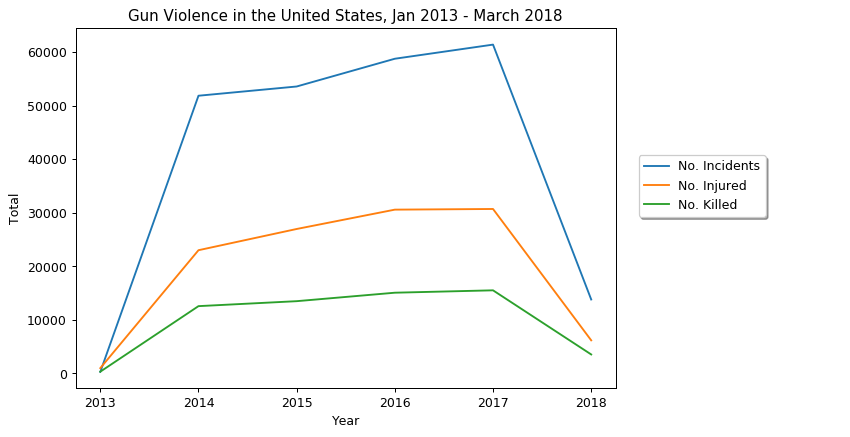

In [14]:
fig1 = plt.figure(dpi=90)
ax = fig1.add_axes([0,0,1,1])
ax.set_title('Gun Violence in the United States, Jan 2013 - March 2018')
ax.set_xlabel('Year')
ax.set_ylabel('Total')
ax.plot(df_inc_ids.index,df_inc_ids['count'],label='No. Incidents')
ax.plot(df_inc_ids.index,df_inc_ids['n_injured'],label='No. Injured')
ax.plot(df_inc_ids.index,df_inc_ids['n_killed'],label='No. Killed')
fig1.legend(loc='upper center', bbox_to_anchor=(1.3, 0.8), shadow=True, ncol=1)

In [15]:
df_inc_ids.index[1:-1]

Int64Index([2014, 2015, 2016, 2017], dtype='int64', name='year')

# 2. Gender ratio per year and in total


In [16]:
usa_gv['num_male_part'] = None

In [17]:
usa_gv['num_female_part'] = None

In [18]:
#t='0::Male||1::Male||3::Male||4::Female'
# how to NOT name ur variables
def count_gender_male(t):
    tt = t.split('||')
    ttt = ' '.join(tt)
    tttt = ttt.split('::')
    ttttt = ''.join(tttt)
    #ttttt
    tttttt = ttttt.split(' ')
    #tttttt
    num_male = 0
    num_female = 0
    for t in tttttt:
        if t[1] == 'M':
            num_male += int(t[0])
    return num_male

def count_gender_female(t):
    tt = t.split('||')
    ttt = ' '.join(tt)
    tttt = ttt.split('::')
    ttttt = ''.join(tttt)
    #ttttt
    tttttt = ttttt.split(' ')
    #tttttt
    num_female = 0
    for t in tttttt:
        if t[1] == 'F':
            num_female += int(t[0])
    return num_female

In [19]:
total_male = usa_gv['participant_gender'].apply(lambda x: count_gender_male(str(x)))
total_female = usa_gv['participant_gender'].apply(lambda x: count_gender_female(str(x)))

In [28]:
usa_gv['total_male'] = total_male
usa_gv['total_female'] = total_female

In [37]:
usa_gv['year'] = pd.to_datetime(usa_gv['date']).dt.year

##### Make dist plots for these once learned:

In [39]:
usa_gv.groupby('year')[['total_male','total_female']].sum()

,total_male,total_female
year,,
2013,2417,554
2014,58924,6889
2015,48597,6497
2016,50881,6921
2017,47462,6118
2018,9931,1395


##### Make dist plots for these once learned:

In [25]:
total_male.sum()

218212

In [26]:
total_female.sum()

28374

## 3. number of guns involved per incident

In [53]:
usa_gv['n_guns_involved'].sum()/usa_gv[~usa_gv['n_guns_involved'].isnull()]['n_guns_involved'].count()

1.3724416299402393

## 4. number of people killed per incident

In [55]:
usa_gv['n_killed'].sum() / usa_gv['incident_id'].count()

0.25228953967214207

## 5. Average age of shooter

In [57]:
usa_gv.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district', 'num_male_part', 'num_female_part',
       'total_male', 'total_female', 'year'],
      dtype='object')

## 6. States incident counts

In [66]:
usa_gv['state'].value_counts()

Illinois                17556
California              16306
Florida                 15029
Texas                   13577
Ohio                    10244
New York                 9712
Pennsylvania             8929
Georgia                  8925
North Carolina           8739
Louisiana                8103
Tennessee                7626
South Carolina           6939
Missouri                 6631
Michigan                 6136
Massachusetts            5981
Virginia                 5949
Indiana                  5852
Maryland                 5798
Alabama                  5471
New Jersey               5387
Wisconsin                4787
Kentucky                 4157
Mississippi              3599
Oklahoma                 3455
Washington               3434
Colorado                 3201
District of Columbia     3195
Connecticut              3067
Arkansas                 2842
Iowa                     2517
Minnesota                2408
Arizona                  2328
Oregon                   2286
Kansas    

In [69]:
usa_gv['city_or_county'].value_counts()

Chicago                       10814
Baltimore                      3943
Washington                     3279
New Orleans                    3071
Philadelphia                   2963
Saint Louis                    2501
Houston                        2501
Milwaukee                      2487
Jacksonville                   2448
Memphis                        2386
Columbus                       2252
Indianapolis                   1920
Detroit                        1834
Cleveland                      1784
Springfield                    1755
Boston                         1737
San Antonio                    1628
Oakland                        1501
Louisville                     1425
Brooklyn                       1418
Kansas City                    1381
Jackson                        1367
Atlanta                        1358
Las Vegas                      1348
Nashville                      1329
Richmond                       1317
Wilmington                     1296
Charlotte                   

In [71]:
usa_gv.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district', 'num_male_part', 'num_female_part',
       'total_male', 'total_female', 'year'],
      dtype='object')

### What site gives the most sources on gun violence?

In [77]:
usa_gv['sources'].head()

0    http://pittsburgh.cbslocal.com/2013/01/01/4-pe...
1    http://losangeles.cbslocal.com/2013/01/01/man-...
2    http://www.morningjournal.com/general-news/201...
3    http://denver.cbslocal.com/2013/01/06/officer-...
4    http://myfox8.com/2013/01/08/update-mother-sho...
Name: sources, dtype: object